## Binning function test

In [1]:
def binning(dictionary, binsize):
    bins = {}
    for value in dictionary:
        floe_count = dictionary[value]
        # count which bins the value should be in
        if value % binsize == 0:
            bin_num = value//binsize  ## ex: 5%5=0 and 5 is under 1~5
        else:
            bin_num = value//binsize +1 ## ex: 3%5=3, 3//5 = 0 and 3 is under 1~5
        size = bin_num * binsize
        if size not in bins:
            bins[size] = floe_count
        else:
            bins[size] += floe_count
    return bins

In [8]:
test = {1:3, 2:5, 6:3, 11:1}

binning(test, 5)

{5: 8, 10: 3, 15: 1}

## Theory Test four

In [30]:
from collections import OrderedDict
import matplotlib.pyplot as plt 
from alive_progress import alive_bar

In [33]:
def rate_simulate(rate, times):
    size_dis = OrderedDict([(1000000, 4)])
    with alive_bar(100) as bar:
        for i in range(times):
            smallest_key = list(size_dis.keys())[-1]
            smallest_value = size_dis[smallest_key]
            #print(smallest_key, smallest_value)
            for j in range(int(smallest_value * rate)):
                #print(j)
                size = smallest_key/4
                if size not in size_dis:
                    size_dis[size] = 4
                else:
                    size_dis[size] += 4
            size_dis[smallest_key] -=smallest_value * rate
            bar()
            #print(size_dis.items())
    sizes = list(size_dis.keys())
    sizes.sort()
    counts = [size_dis[i] for i in sizes]
    print("sizes: ", sizes)
    print("counts: ",counts)
    plt.plot(sizes, counts, marker='o', linestyle='-')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Node Size')
    plt.ylabel('Probability')
    plt.title('Size Distribution of ice floes')
    plt.show()

|▍⚠︎                                      | (!) 1/100 [1%] in 0.0s (21220.16/s) 
sizes:  [250000.0, 1000000]
counts:  [12, 1.0]


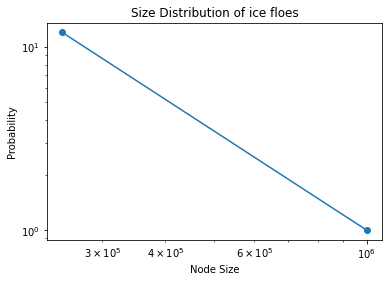

In [26]:
rate_simulate(3/4, 1)

|▊⚠︎                                      | (!) 2/100 [2%] in 0.0s (49689.44/s) 
sizes:  [62500.0, 250000.0, 1000000]
counts:  [36, 3.0, 1.0]


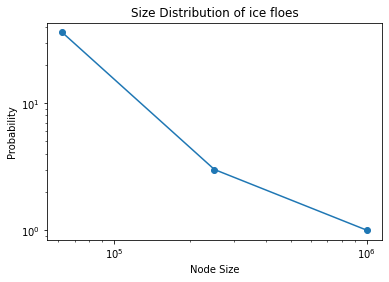

In [27]:
rate_simulate(3/4, 2)

|████⚠︎                                   | (!) 10/100 [10%] in 0.0s (443.04/s) 
sizes:  [0.95367431640625, 3.814697265625, 15.2587890625, 61.03515625, 244.140625, 976.5625, 3906.25, 15625.0, 62500.0, 250000.0, 1000000]
counts:  [236196, 19683.0, 6561.0, 2187.0, 729.0, 243.0, 81.0, 27.0, 9.0, 3.0, 1.0]


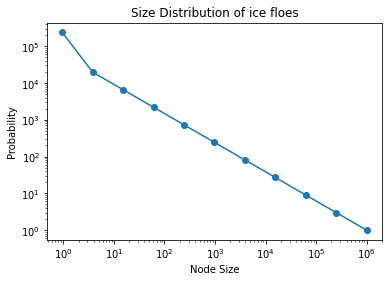

In [28]:
rate_simulate(3/4, 10)

In [ ]:
rate_simulate(3/4, 50)

In [22]:
rate_simulate(3/4, 100)

KeyboardInterrupt: 

# Visualization (only used for debug)

In [1]:
# sudo apt install -y graphviz
# pip3 install graphviz
from graphviz import Graph, Digraph

In [4]:
# draw the nodes in a tree graph
def tree_graph(node, g):
    if node.children == []:
        return g
    for child in node.children:
        g.edge(node.id, child.id)
        tree_graph(child, g)
    return g
#Usage:
#g = Digraph()
#tree_graph(quard.root, g)

# Example
### Test 1 
    1. divide once, check leave list, parent list, size distribution)
    2. divede again, check leave list, parent list, size distribution)
    3. weld once, check leave list, parent list, size distribution

In [2]:
from quardTree import Node,QTree

sizes:  [250000.0]
counts:  [4]


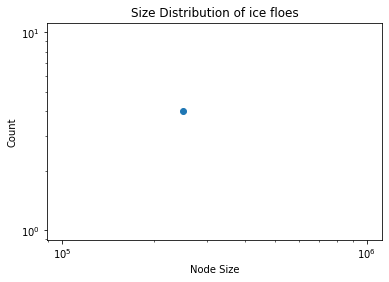

leave list: ['13e7', '8a88', '6c71', '3d23']
parent list: ['4bfb']


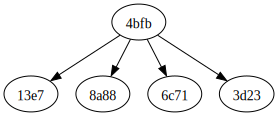

In [5]:
quard = QTree()
quard.subdivide(quard.root)
quard.plot_size_distribution()
g = Digraph()
print("leave list:", [i.id for i in quard.get_leaves()])
print("parent list:", [i.id for i in quard.get_parent()])
tree_graph(quard.root, g)

sizes:  [250000.0, 62500.0]
counts:  [3, 4]


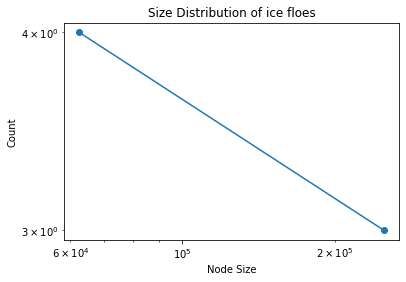

leave list: ['8a88', '6c71', '3d23', 'f226', '4a18', '6521', 'a019']
parent list: ['13e7']


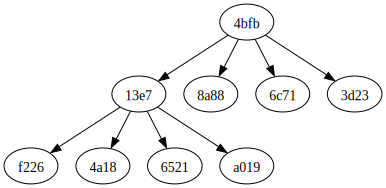

In [6]:
quard.subdivide(quard.root.children[0])
quard.plot_size_distribution()
g = Digraph()
print("leave list:", [i.id for i in quard.get_leaves()])
print("parent list:", [i.id for i in quard.get_parent()])
tree_graph(quard.root, g)

sizes:  [250000.0]
counts:  [4]


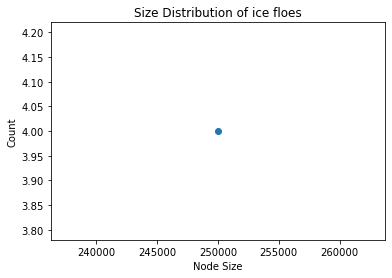

leave list: ['6e6c', '48cd', 'e2f6', 'fe4d']
parent list: []


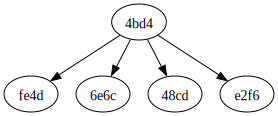

In [17]:
quard.weld(quard.root.children[0])
quard.plot_size_distribution()
g = Digraph()
print("leave list:", [i.id for i in quard.get_leaves()])
print("parent list:", [i.id for i in quard.get_parent()])
tree_graph(quard.root, g)

### Test 2: Probability of each state in equilibrium distribution.
    1. Run one simulation for a long time.
    2. Calculate the fraction of the time that is spent in each state, averaged over the long time of the simulation.
    3. This should be an estimate of the probability of each state in equilibrium distribution.
    4. Also calculate the equilibrium distribution with paper and pencil (i.e., the “theory”).
    5. Compare the simulation and the theory.
    6. Also: could define T as the duration of the simulation, and could watch the simulated probabilities converge to the theoretical probabilities as T → ∞ (i.e., as the system gets closer to the stationary state and equilibrium distribution).

### Test 3: Time evolution of probabilities.
    1. Write out (on paper and pencil) the theoretical equations for the evolution of the probabilities of the two states.
    2. The answer should also depend on the initial state – or actually on the initial probabilities of the two states.
    3. Should be a 2 × 2 system of ODEs.
    4. Write out the analytical solution for the ODEs. Should be exponentials.
    5. Simulations:
    6. Need an ensemble of simulations now
    7. Initial state: let it be deterministic, so the initial probability is a delta function
    (Later can consider more general case, where initial state is probabilistic and uncertain.)
    8. Fix a particular final time T .
    9. Simulate/calculate the probability (based on averaging over ensemble members) of being in each state at time T .
    10. Or could do the probability for all t in the interval [0, T ].
    11. Let the number of ensemble members Ne increase, and should see convergence of simulated/calculated probability toward the theoretical probability

### Test 4: Convergence test as ∆t → 0.
    1. ...
    2. ... similar to Test #2, but now fix the number of ensemble members Ne at some large value (so the error is coming from ∆t finite rather than from Ne too small), and take ∆t smaller and smaller and watch for convergence of probabilities toward the theoretical values

### Test 5: A different code for a different stochastic process that we know has a power law
    1. ...
    2. ... see subsection 4.5 for further description, for now ...
    3. ... and eventual goal of adding more realism to subsection 4.5 ..

# Check whether the size distribution is a powerlaw distribtuion

In [37]:
# install by `pip install powerlaw`
import powerlaw
def check_power_law_distribution(size_distribution):
#     sizes = list(size_distribution.keys())
#     counts = [len(i) for i in size_distribution.values()]
    sizes = []
    for size, count in size_distribution.items():
        sizes.extend([size] * count)
    # Fit power law model
    fit = powerlaw.Fit(sizes, discrete=True)

    # Plot the distribution and power law fit
    fit.plot_ccdf(color='r', linewidth=2)
    # Returns the loglikelihood ratio, and its p-value, between the two distribution fits, 
    # assuming the candidate distributions are nested.
    fit.power_law.plot_ccdf(color='g', linestyle='--', ax=plt.gca())

    # Perform goodness-of-fit test
    R, p_value = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    print("p_value: ", p_value)
    if p_value < 0.05:
        print("The size distribution is not a good fit for a power law distribution.")
    else:
        print("The size distribution is a good fit for a power law distribution.")

    plt.xlabel('Node Size')
    plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
    plt.title('Size Distribution and Power Law Fit')
    plt.show()

#Usage:
#size_distribution = find_size(quard1.root)
#check_power_law_distribution(size_distribution)

/var/folders/1l/9llj3y4x2816ss7f33x55j8w0000gn/T/ipykernel_17687/780678046.py:8: RuntimeWarning: divide by zero encountered in power
  y = a*x**(a-1.)


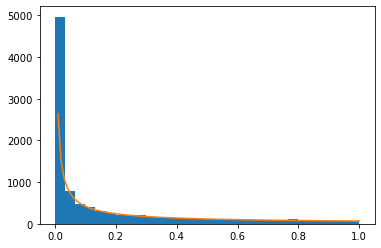

In [44]:
import numpy as np
a = 0.2 # shape
samples = 10000
s = np.random.power(a, samples)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=30)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

Calculating best minimal value for power law fit
p_value:  2.4030359675223927e-28
The size distribution is not a good fit for a power law distribution.


/Users/marissazhang/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/Users/marissazhang/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))


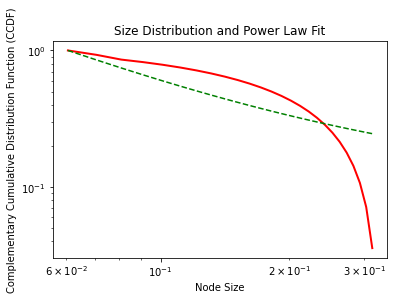

In [45]:
#print(x,y)
res = {}
for A, B in zip(x, y):
    try:
        res[A] = round(B)
    except:
        continue
check_power_law_distribution(res)